In [1]:
%matplotlib inline

In [2]:
from __future__ import division

When working with Python 2.X, the above import is extremely important.

In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="darkgrid")

#import matplotlib
#matplotlib.style.use('ggplot')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

# Exploratory Data Analysis

It seems like we took our time getting to actual *data* analysis but now that we have arrived, we have an excellent foundation to begin *Exploratory Data Analysis*,

1. We know what our goals are because we've communicated with stakeholders (Soft Skills).
2. We know that when we create or are given a data set that these are measurements of variables in a system of interactions which can be mutually balancing or reinforcing. (Systems Thinking).
3. We know that we don't have all the information about the system. We don't know all of the variables, we don't know all of the interactions but we have a tool to deal with our uncertainty (Probability).
4. We know that many patterns in the data will be hidden from us until we look and that in many cases, charts will be the best way to communicate the relationships we find (Visualization).

Now let's dig deeper into what Exploratory Data Analysis (EDA) is.

## Purpose of Exploratory Data Analysis

Exploratory Data Analysis was developed by John Tukey in the 1970s. Originally, he felt it was a step before *Confirmatory* Data Analysis (Statistical Inference). Over the years, the goals have shifted somewhat but the general thrust is that before you do any modeling of your data, you should just **look** at your data. And the word "look" is apropos here as EDA places a special emphasis on graphical/visual techniques. The *Handbook of Exploratory Data Analysis* [^handbook_eda] describes the purpose of EDA as follows:

1. Maximize insight into the data set;
2. Uncover underlying structure;
3. Extract important variables;
4. Detect outliers and anomalies;
5. Test underlying assumptions;
6. Develop parsimonious ("frugal") models; and
7. Determine optimal factor settings.

All of which are very important to data scientists.

EDA emphasizes visual techniques because parameteric summary statistics (mean, standard deviation, correlation) can be misleading. In some cases they beg the question. If you haven't determined if the normal distribution is a good model for a variable, why are you calculating the mean and variance? 

Non-parametric summary statistics (median, interquartile range) can be misleading as well although to a lesser degree. The poster child for EDA is Anscombe's Quartet, four data sets of two variables (x, y) where all of the x's have the same mean and variance, all of the y's have the same mean and variance; and the Pearson's correlation coefficient between the x and y is the same for each data set.

In [4]:
data_set_a = [(10.0, 8.04), (8.0, 6.95), (13.0, 7.58), (9.0, 8.81), (11.0, 8.33), (14.0, 9.96), (6.0, 7.24), (4.0, 4.26), (12.0, 10.84), (7.0, 4.82), (5.0, 5.68)]
data_set_b = [(10.0, 9.14), (8.0, 8.14), (13.0, 8.74), (9.0, 8.77), (11.0, 9.26), (14.0, 8.10), (6.0, 6.13), (4.0, 3.10), (12.0, 9.13), (7.0, 7.26), (5.0, 4.74)]
data_set_c = [(10.0, 7.46), (8.0, 6.77), (13.0, 12.74), (9.0, 7.11), (11.0, 7.81), (14.0, 8.84), (6.0, 6.08), (4.0, 5.39), (12.0, 8.15), (7.0, 6.42), (5.0, 5.73)]
data_set_d = [(8.0, 6.58), (8.0, 5.76), (8.0, 7.71), (8.0, 8.84), (8.0, 8.47), (8.0, 7.04), (8.0, 5.25), (19.0, 12.50), (8.0, 5.56), (8.0, 7.91), (8.0, 6.89)]

In [5]:
def analyze_data( name, data_set):
    x, y = zip( *data_set)
    print name
    print "----------"
    print "Stats", "Mean", "Variance", "Correlation"
    print "X", "%.2f" % np.mean( x), "%.2f" % np.var( x)
    print "Y", "%.2f" % np.mean( y), "%.2f" % np.var( y), "%.2f" % stats.pearsonr( x, y)[ 0]
    print "---------"

In [6]:
analyze_data( "Data Set A", data_set_a)
analyze_data( "Data Set B", data_set_b)
analyze_data( "Data Set C", data_set_c)
analyze_data( "Data Set D", data_set_d)

Data Set A
----------
Stats Mean Variance Correlation
X 9.00 10.00
Y 7.50 3.75 0.82
---------
Data Set B
----------
Stats Mean Variance Correlation
X 9.00 10.00
Y 7.50 3.75 0.82
---------
Data Set C
----------
Stats Mean Variance Correlation
X 9.00 10.00
Y 7.50 3.75 0.82
---------
Data Set D
----------
Stats Mean Variance Correlation
X 9.00 10.00
Y 7.50 3.75 0.82
---------


Plotting the Tukey's "Five Number" summary statistics doesn't help much. In the case of x1, x2 and x3...they're all the same while only x4 is different. The y's are different but not by huge amounts. It doesn't really tell you how they're different or if the linear model is any good (Pearson's Correlation Coefficient is a linear model).

In [7]:
def tukeys_five( name, variables, data_sets):
    def f( val):
        return "%.2f" % val
    print name
    print "----------"
    print "Stat", "Min", "1Q", "Median", "3Q", "Max"
    for i, data_set in enumerate( data_sets):
        quartiles = stats.mstats.mquantiles( data_set, [0.25, 0.5, 0.75])    
        print variables[ i], f( np.min( data_set)), f( quartiles[ 0]), f(quartiles[ 1]), f(quartiles[ 2]), f(np.max( data_set))
    print "----------"

In [8]:
tukeys_five( "Data Set A", ["X", "Y"], zip(*data_set_a))
tukeys_five( "Data Set B", ["X", "Y"], zip(*data_set_b))
tukeys_five( "Data Set C", ["X", "Y"], zip(*data_set_c))
tukeys_five( "Data Set D", ["X", "Y"], zip(*data_set_d))

Data Set A
----------
Stat Min 1Q Median 3Q Max
X 4.00 6.20 9.00 11.80 14.00
Y 4.26 5.93 7.58 8.71 10.84
----------
Data Set B
----------
Stat Min 1Q Median 3Q Max
X 4.00 6.20 9.00 11.80 14.00
Y 3.10 6.36 8.14 9.06 9.26
----------
Data Set C
----------
Stat Min 1Q Median 3Q Max
X 4.00 6.20 9.00 11.80 14.00
Y 5.39 6.15 7.11 8.08 12.74
----------
Data Set D
----------
Stat Min 1Q Median 3Q Max
X 8.00 8.00 8.00 8.00 19.00
Y 5.25 5.92 7.04 8.36 12.50
----------


Only by plotting the data do you see the underlying structure:

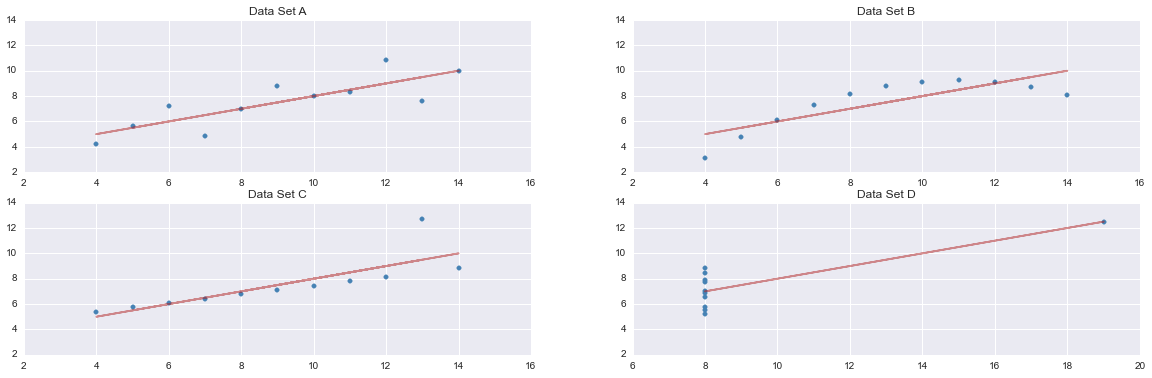

In [9]:
figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(2, 2, 1)
x, y = zip( *data_set_a)
axes.scatter( x, y, color="steelblue")
m, b = np.polyfit(x, y, 1)
axes.plot(x, [m * j + b for j in x], '-', color="firebrick", alpha=0.5)
axes.set_title( "Data Set A")
axes.set_ylim((2, 14))

axes = figure.add_subplot(2, 2, 2)
x, y = zip( *data_set_b)
axes.scatter( x, y, color="steelblue")
m, b = np.polyfit(x, y, 1)
axes.plot(x, [m * j + b for j in x], '-', color="firebrick", alpha=0.5)
axes.set_title( "Data Set B")
axes.set_ylim((2, 14))

axes = figure.add_subplot(2, 2, 3)
x, y = zip( *data_set_c)
axes.scatter( x, y, color="steelblue")
m, b = np.polyfit(x, y, 1)
axes.plot(x, [m * j + b for j in x], '-', color="firebrick", alpha=0.5)
axes.set_title( "Data Set C")
axes.set_ylim((2, 14))

axes = figure.add_subplot(2, 2, 4)
x, y = zip( *data_set_d)
axes.scatter( x, y, color="steelblue")
m, b = np.polyfit(x, y, 1)
axes.plot(x, [m * j + b for j in x], '-', color="firebrick", alpha=0.5)
axes.set_title( "Data Set D")
axes.set_ylim((2, 14))

plt.show()

## Taxonomy of EDA

EDA is a loose collection of techniques and a philosophy for looking at your data and answering a variety of questions: What is the typical value of the variable? Does this variable have any outliers? Are any values missing? What is the variability of the variable? Are this variable and that variable related? Is the Gaussian distribution a good model for this variable? The appropriate technique depends on the one or more characteristics in an overall taxonomy:

* variable type: qualitative or quantitative
* technique: tabular or graphical
* variable number: univariate or multivariate
* goal: summary, comparison, or other.

Previously we discussed different *kinds* of data based on the measurement type (nominal, ordinal, interval and ratio) or the simple data type (binary, categorical, ordinal, count, real valued-additive, real-valued multiplicative). For the purposes of discussing EDA, we're going to simplify the taxonomy a bit to just qualitative or quantitative data.

Therefore, knowing what EDA technique to use is mostly a matter of locating yourself in a multi-dimensional grid. To illustrate the concepts for EDA, we'll use the Autos Data Set from UCI [^uci_automobile] because it contains a wide variety of types of variables.

In [10]:
autos = pd.read_csv( "resources/data/imports-85.data.csv", names=["symbolizing", "normalized_losses", "make", "fuel_type", "aspiration", "doors", "body_style", "drive", "engine_location", "wheel_base", "length", "width", "height", "curb_weight", "engine_type", "cylinders", "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horse_power","peak_rpm", "city_mpg", "highway_mpg", "price"])

The very first thing you need to do when you finally get to the point where you are loading your data, perhaps painstakingly acquired, into your environment is that all of the data is loaded and has the data type you expect. That means that dates were converted to Dates, numbers that are codes that might have leading zeroes where converted to strings, etc., that "NA" has been treated in the right way.

In [11]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
symbolizing          205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
doors                205 non-null object
body_style           205 non-null object
drive                205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
cylinders            205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horse_power          205 non-nul

The first thing to check is to see if the *computer* types match your expectations about the *data* types. For example, "doors" is an object variable when it feels like it should be an int64. Why is that?

In [12]:
autos.doors.value_counts()

four    114
two      89
?         2
dtype: int64

There are missing values coded as "?". This might have been something we did or someone else did but it's messing a few things up. We can take care of that in Pandas by specifying a custom `na_values` when we read the CSV:

In [13]:
autos = pd.read_csv( "resources/data/imports-85.data.csv", 
                     names=["symbolizing", "normalized_losses", "make", "fuel_type", "aspiration", "doors", "body_style", "drive", "engine_location", "wheel_base", "length", "width", "height", "curb_weight", "engine_type", "cylinders", "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horse_power","peak_rpm", "city_mpg", "highway_mpg", "price"],
                     na_values="?")

In [14]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
symbolizing          205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
doors                203 non-null object
body_style           205 non-null object
drive                205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
cylinders            205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horse_power          203 non-

In [15]:
autos.city_mpg.dtype

dtype('int64')

That solves one problem...the "?" is now appropriately recognized as "NA" and not a possible value of a qualitative variable. While this might seem to be a "test tube" problem and not exactly a data science concept, this happens often enough regardless of the tool you're using that you need to be aware of it. The first bit of EDA is just making sure you understand what's in the data and that you are reading it correctly into your analytical environment. The end result will be an iterative process that requires you to edit the data, reload it, look, recode or transform and repeat. You may even need to get new data.

**Whatever your tool ("test tube") is, review the computer types that it uses to store data types**. Just to make it a bit more annoying, this changes. For example, Pandas has added support for category types as a computer type.

It's going to be a bit tedious to do this for every variable, though.

This is where your "data science toolbox" comes in. Depending on how high or low level your tools are, you're going to want to make a collective of scripts and functions that automate this work as much as possible so you just have to look at the results to determine if everything is ok.



In [16]:
def examine_data_frame( df):
    for name in df.columns:
        print "----------"
        print df[ name].dtype
        if df[ name].dtype is np.dtype( 'O'):
            print df[ name].value_counts()
            print "Name: ", name
        else:
            print df[ name].describe()

In [17]:
examine_data_frame( autos)

----------
int64
count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symbolizing, dtype: float64
----------
float64
count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64
----------
object
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
dtype: int64
Name:  make
----------
object
gas       185
diesel     20
dtype: int64
Name:  fuel_type
----------


It isn't perfect, however. For example, all of the qualitative variables now say they're "int64" but that's the type of the data structure that holds the counts...not the type of the data. *Caveat emptor*.

In any case, by looking at the data we can see at least two things we want to change. Both `doors` and `cylinders` are encoded as words but could really be numbers (they're counts, afterall). Such transformations are really beyond the scope of EDA and belong with the manual for whatever tool you're using. We mention them here because after having obtained your data and having finally read it into your analytical environment, this is where you're most likely to encounter this problem.

Once you have the data in basic working order with everything the *computer* type you want to represent the *data* type it is, you can continue with traditional EDA.

## Single Qualitative Variable

There are only a few options for analyzing a single qualitative variable. The non-graphical option is to generate a tabulation while the graphical one is to generate a bar graph. Both approaches can show either the absolute frequencies (counts) or relative frequencies (percentages) for each category or outcome.

### Tables of Frequencies

We've already seen the chief place to start with a single qualitative variable, frequencies:

In [18]:
autos[ "body_style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
dtype: int64

These are counts or absolute frequencies. Often what we would like to do is look at *relative* frequencies:

In [19]:
autos[ "body_style"].value_counts( normalize=True)

sedan          0.468293
hatchback      0.341463
wagon          0.121951
hardtop        0.039024
convertible    0.029268
dtype: float64

### Bar Graphs

The graphical alternative is to plot the frequencies (either absolute or relative) as a dot or bar chart.

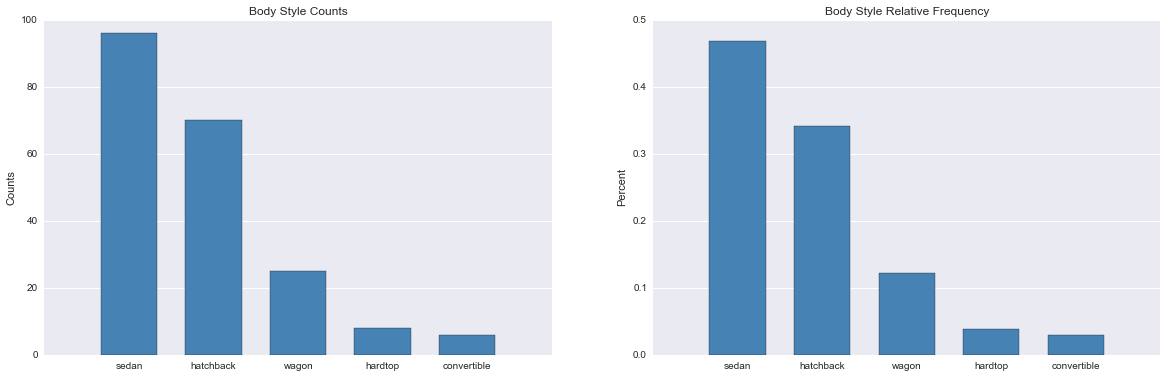

In [20]:
data1 = autos[ "body_style"].value_counts()
data2 = autos[ "body_style"].value_counts( normalize=True)
x = range( len( data1))
width = 1/1.5

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.bar(x, data1, width, color="steelblue", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(data1.axes[0])
axes.set_title( "Body Style Counts")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)

axes = figure.add_subplot(1, 2, 2)
axes.bar(x, data2, width, color="steelblue", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(data2.axes[0])
axes.set_title( "Body Style Relative Frequency")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()

You might be tempted to use a pie chart at this juncture. Don't. Ever.

However, if you're trying to emphasize the *differences* it might also be worth plotting a dot chart:

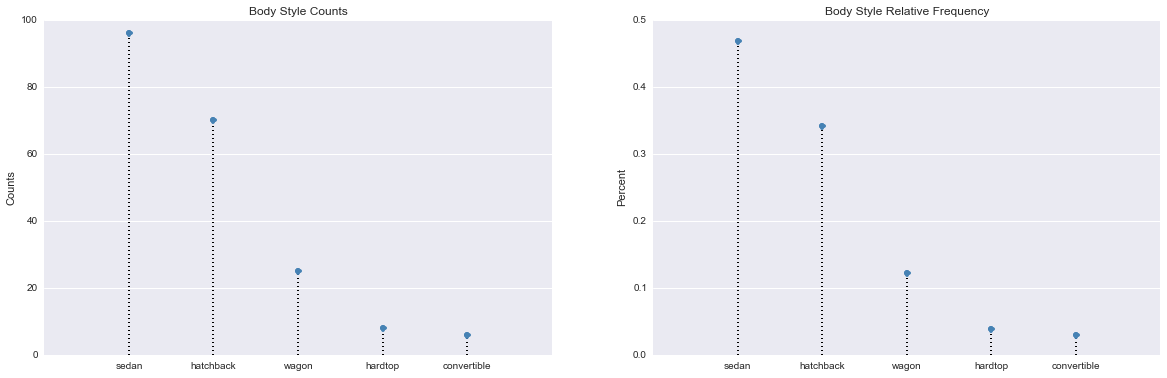

In [21]:
figure = plt.figure(figsize=(20, 6))

xs = [1, 2, 3, 4, 5]
axes = figure.add_subplot(1, 2, 1)
axes.plot(xs, data1, "o", color="steelblue")
axes.vlines(xs, [0], data1, linestyles='dotted', lw=2)
axes.set_xticks(xs)
axes.set_xlim((0, 6))
axes.set_xticklabels(data1.axes[0])
axes.set_title( "Body Style Counts")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)

axes = figure.add_subplot(1, 2, 2)
axes.plot(xs, data2, "o", color="steelblue")
axes.vlines(xs, [0], data2, linestyles='dotted', lw=2)
axes.set_xlim((0, 6))
axes.set_xticks(xs)
axes.set_xticklabels(data2.axes[0])
axes.set_title( "Body Style Relative Frequency")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()

This also demonstrates that the tool you're using may not natively support the chart type you want to use so if you use a high level library, it's worth knowing how the low level library works. If you did this often, you should make the function completely general and add it to your toolbox.

## Single Quantitative Variable

There are many more options when it comes to analyzing a quantitative variable (although most of those options are graphical). The We'll start with the non-graphical approaches.

### Summary Statistics

The most common summary statistics in EDA are the minimum, first quartile, median (2nd quartile), 3rd quartile, maximum and sometimes the mean. We generally avoid calculating the mean or standard deviation because the standard high school versions we've been learned as well as the ubiquitous `average` and `std` functions in Excel or MySQL or whatever are the formulas for the *Gaussian* (Normal) distribution and we're not, at this point, committed to any particular reference distribution for our variables. Since most standard functions will include mean and standard deviation, we'll avoid pedantry.

Nevertheless, if we include the mean, it is possible to learn a bit more about the distribution of our variable by comparing it to the median. A median that is larger than the mean indicates a distribution that is skewed "down" and a median that is smaller than the mean indicates a distribution that is skewed "up".

In [22]:
autos[ "curb_weight"].describe()

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curb_weight, dtype: float64

We actually saw all of this information earlier when we were checking that our data import was successful but right now we're concentrating on the numbers a bit more carefully. It's possible we may find something is wrong, something we didn't notice earlier. This is where the notebook approach shines. We can go back and fix mistakes, make notes and re-execute the notebook to get back to where we were when we discovered the error.

### Boxplot

When we turn to graphical techniques, the options open up. There is a graphical equivalent of the "5 Numbers" summary statistics called the boxplot. Boxplots can have a lot of configuration options so it's worth looking into them in order to make boxplots that highlight the data you want to highlight in the way you want it highlighted.

Here are two boxplots, one regular box plot and one with the actual data points added with a bit of "jitter" to handle the problem of overplotting (when many identical or similar observations are plotted to the same location on the chart).

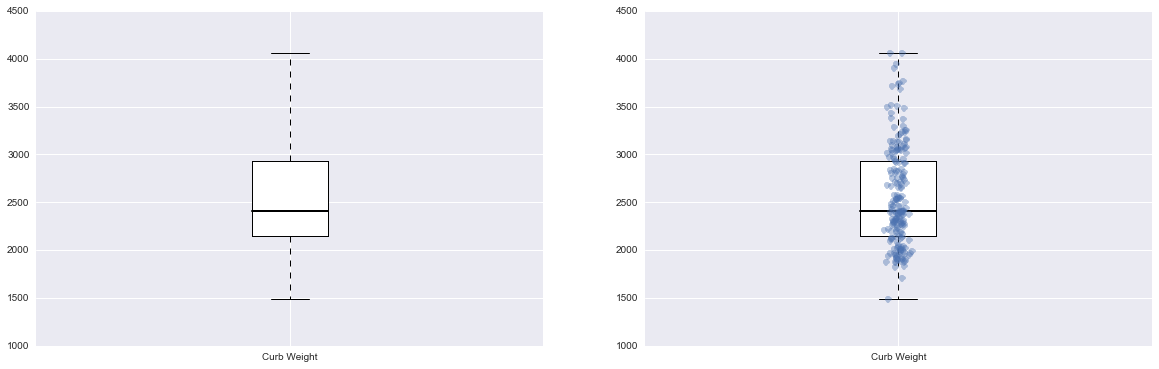

In [23]:
def restyle_boxplot( patch):
    ## change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    ## change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    ## change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    ## change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
patch = axes.boxplot( autos[ "curb_weight"], labels=["Curb Weight"], showfliers=True, patch_artist=True)
restyle_boxplot( patch)

axes = figure.add_subplot(1, 2, 2)
patch = axes.boxplot( autos[ "curb_weight"], labels=["Curb Weight"], patch_artist=True)
restyle_boxplot( patch)
x = np.random.normal(1, 0.01, size=len(autos["curb_weight"]))
axes.plot(x, autos[ "curb_weight"], 'o', alpha=0.4)

plt.show()

### Histogram

A different way of viewing this data is as the approximation of a probability density using a histogram. The technique was developed by Karl Pearson. The histogram assigns each observation to a fixed number of "bins" that are then represented as bars as in a bar graph. The number (or size) of bins relative to the characteristics of the data can affect the efficacy of the histogram.

Histograms can express absolute counts or be expressed as densities (the continuous version of probability mass or relative frequency).

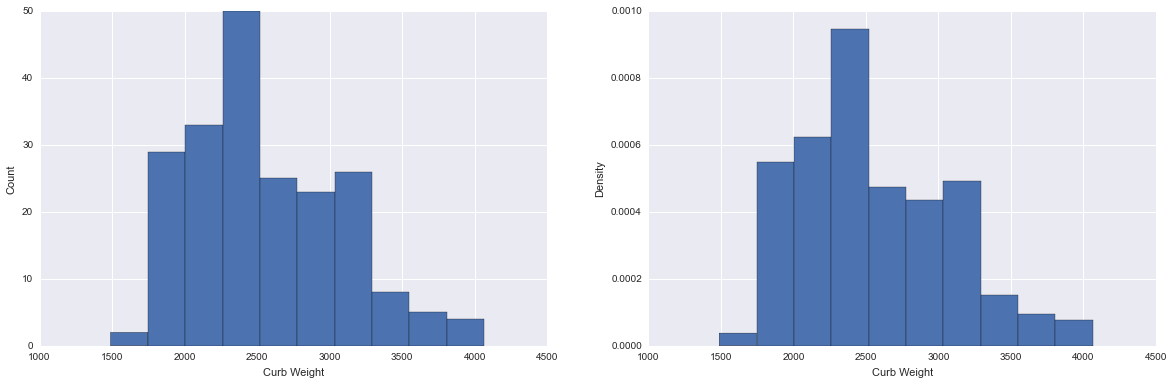

In [24]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( autos[ "curb_weight"])
axes.set_ylabel( "Count")
axes.set_xlabel( "Curb Weight")

axes = figure.add_subplot(1, 2, 2)
axes.hist( autos[ "curb_weight"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "Curb Weight")

plt.show()

When using your tools histogram feature, you should read the documentation to find out how it determines the bin size (if it'll tell you). There are a number of algorithms available that purport to determine "the best" bin widths but you consider looking at different bin sizes on your own to reveal interesting structure in your data.

Not every library works the same way. For example, R takes binwidths whereas Python takes the actual bin edges. If we want to look at bins that are 5 pounds in width, we have:

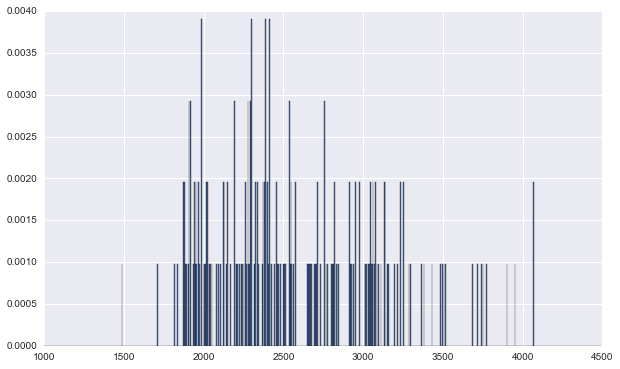

In [25]:
bins = [1000 + i for i in xrange( 0, 3500, 5)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist( autos[ "curb_weight"], bins=bins, normed=True)
plt.show()

This changes the shape of the distribution quite a bit but you have to be careful when comparing this histogram to other histograms of the same variable because the y axis has changed.

There are number of formulas for calculating the number of bins or the bin width. They are not the same although you can perform approximate conversions between them:

$$k=\lceil\frac{max~x - min~x}{h}\rceil$$

where k is the number of bins and h is the bin width or:

$$h=\lfloor\frac{k}{max~x - min~x}\rfloor$$

The binning rules are:

1. Square Root Rule

$k = \sqrt{n}$

2. Sturges' Formula

$k = \lceil log_2~n + 1\rceil$

This is the default in R's `ggplot2` but not necessarily the "best" choice.

3. Rice Rule

$k = \lceil 2n^{1/3}\rceil$

4. Doane's Formula

$k = 1 + log_2~n + log_2(1 + \frac{\lvert g_1 \rvert}{\sigma_{g_1}})$

$\sigma_{g_1} = \sqrt{\frac{6(n-2)}{(n+1)(n+3)}}$

5. Scott's Normal Reference Rule

$h=\frac{3.5\hat{\sigma}}{n^{1/3}}$

6. Freedman-Diaconis' Rule

$h=2\frac{IQR(x)}{n^{1/3}}$

where IQR is the interquartile range (Q3 - Q1).

Despite there not being a "best" choice, Freedman-Diaconis' Rule is often used. Here's an example:


Freeman Diaconis:  269


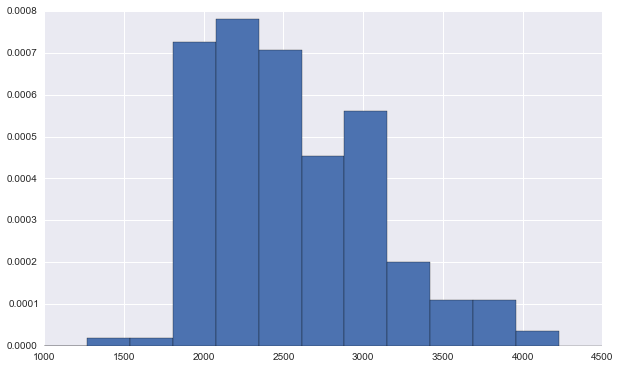

In [26]:
def freeman_diaconis( data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int( h)

h = freeman_diaconis( autos[ "curb_weight"])
print "Freeman Diaconis: ", h
bins = [1000 + i for i in xrange( 0, 3500, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist( autos[ "curb_weight"], bins=bins, normed=True)
plt.show()

This is actually fairly close to the default, (4066 - 1488) / 269 = 10 bins which is how many the default has. By using h, however, we obtained 11 bins. As mentioned earlier, the conversion between k and h is approximate.

### Comparison Distributions

We often want to see if our variable's empirical distribution approaches a reference, mathematical distribution. For example, we often wonder, is this variable normally distributed? As it turns out, there are actually statistical tests for this. However, this is the wrong question. The right question is, is the normal distribution a good model for this variable?" Remember, "All models are wrong but some are useful. We will talk more later in the semester about the different ways these models can be developed but at this juncture, we're solely interested in the technique for comparing the empirical and theoretical distributions.

It's much easier to compare cumulative masses/densities than simple masses/densities so we change how we express our histogram:

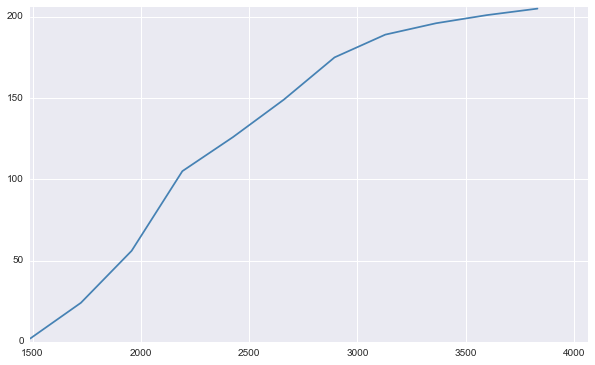

In [27]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

values, base = np.histogram( autos[ "curb_weight"], bins=11)
cumulative = np.cumsum(values)
axes.plot( base[:-1], cumulative, color="steelblue")
axes.set_ylim((0, len( autos[ "curb_weight"])+1))
axes.set_xlim((np.min( autos[ "curb_weight"]), np.max( autos[ "curb_weight"])))

plt.show()

Now we need a distribution to compare to. Let's say we want to compare empirical distribution of body weight to a theoretical normal distribution. The first step would be to estimate the parameters of the theoretical distribution (in this case, mean and standard deviation) from the data. The maximum likelihood estimates of the mean and standard deviation are the usual formulas:

$$\bar{x} = \frac{1}{n}\sum x_i$$

$$s = \sqrt{\sum (x_i - \bar{x})^2}$$

We can use the standard functions for that and at the same time we can use those parameter values to instantiate a normal distribution from which to sample. This is actually a powerful technique that we'll come back to again and again. It has to be graphed as a density (because we need to sample so many more points from the normal distribution compared to the actual count in our empirical distribution--maybe).

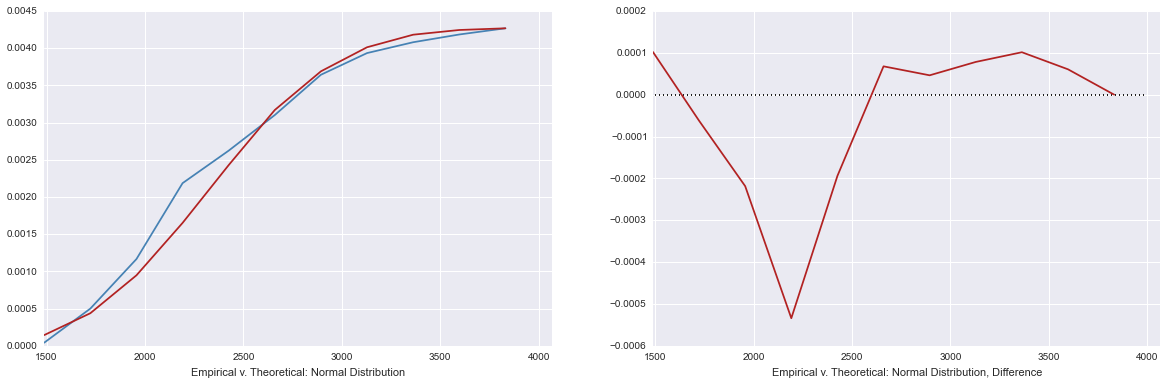

In [28]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)

values, base = np.histogram( autos[ "curb_weight"], bins=11, density=True)
cumulative = np.cumsum(values)
axes.plot( base[:-1], cumulative, color="steelblue")
axes.set_xlim((np.min( autos[ "curb_weight"]), np.max( autos[ "curb_weight"])))

weight_mean = np.mean( autos[ "curb_weight"])
weight_std = np.std( autos[ "curb_weight"])

sampled_data = [weight_mean + r * weight_std for r in np.random.standard_normal(10000)]
values2, base = np.histogram( sampled_data, bins=base, density=True)
cumulative2 = np.cumsum( values2)
axes.plot( base[:-1], cumulative2, color="firebrick")
axes.set_xlim((np.min( autos[ "curb_weight"]), np.max( autos[ "curb_weight"])))
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution")
axes = figure.add_subplot(1, 2, 2)

differences = cumulative2 - cumulative
axes.plot( base[:-1], differences, color='firebrick')
axes.set_xlim((np.min( autos[ "curb_weight"]), np.max( autos[ "curb_weight"])))
axes.hlines(0, 1500, 4000, linestyles="dotted")
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution, Difference")
plt.show()

In general, cumulative distributions are easier to compare and this is the general approach to comparing theoretical and empirical distributions. However, as we learned in Visualization, if it is a *difference* that you're interested in, you should simply plot the difference. This is shown on the second chart. The two together give us a lot of information about the normal distribution as a model for our data. While the second shows the difference between the theortical and empirical cumulative distributions (and thus shows where the normal distribution will over and underestimate), the first gives context for the size of the discrepancy.

We can do this for other distributions as well. We will return to this in later modules.

### Quantile-Quantile or QQ Plot

Another way of comparing an empirical distribution to a reference distribution is by plotting a "QQ Plot" which simple stands for quantiles v. quantiles. For a particular parameterization of a distribution, a certain percent of the data should appear in each quantile. If the reference distribution and empirical distributions are largely the same, they will have the same percentages per quantile.

If you plot the empirical quantiles against the theoretical quantiles (as in a scatter plot), they should appear on or near the x = y line if the reference distribution is a good match for your data.

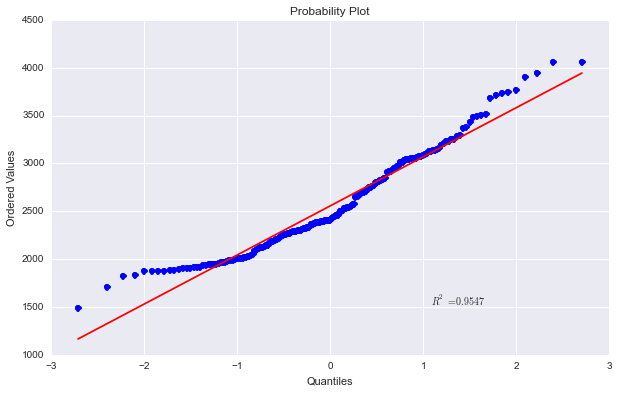

In [29]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)

stats.probplot( autos[ "curb_weight"], dist="norm", plot=axes)

plt.show()

I'm not convinced this is better but some people like QQ-plots. One interesting thing to do is to generate some random data you *know* is normally distributed (by using the technique we showed earlier for generating random data) and see what the QQ-plot tells you. Working with artificial data is a great way to learn how much signal you can actually recover in the presence of different kinds of noise. We will return to this point later.

One thing to consider at this point is looking at other reference distributions and see if they are a better model for you data. For example, try log normal.

## Qualitative v. Qualitative Variables

As with the single qualitative variable case, there's not a lot that can be done when comparing two qualitative variables. The most common non-graphic technique is still just tabulation into absolute frequency (counts) or relative frequency (proportions) tables. Here is the frequency table:

In [30]:
print pd.crosstab( autos[ "fuel_type"], autos[ "doors"])

doors      four  two
fuel_type           
diesel       16    3
gas          98   86


We can get a relative frequency version of this as well:

In [31]:
result = pd.crosstab( autos[ "fuel_type"], autos[ "doors"]).apply(lambda r: r/len( autos), axis=1)
print result

doors          four       two
fuel_type                    
diesel     0.078049  0.014634
gas        0.478049  0.419512


There aren't really any good visualizations for multiple qualitative variables. Remember the purpose of visualization isn't just pretty graphs but to harness the innate pattern recognition capabilities of the our brains. One possibility might be a kind of *heat map* based on relative frequencies. As we've noted before, this might be good when the number of values for each variable exceeds 3 (so that there is more than 9 entries in the table).

fuel_system      1bbl      2bbl      4bbl       idi       mfi      mpfi      spdi      spfi
engine_type                                                                                
dohc         0.000000  0.000000  0.000000  0.000000  0.000000  0.058537  0.000000  0.000000
dohcv        0.000000  0.000000  0.000000  0.000000  0.000000  0.004878  0.000000  0.000000
l            0.000000  0.004878  0.000000  0.024390  0.000000  0.029268  0.000000  0.000000
ohc          0.053659  0.278049  0.000000  0.073171  0.004878  0.263415  0.043902  0.004878
ohcf         0.000000  0.039024  0.000000  0.000000  0.000000  0.034146  0.000000  0.000000
ohcv         0.000000  0.000000  0.000000  0.000000  0.000000  0.063415  0.000000  0.000000
rotor        0.000000  0.000000  0.014634  0.000000  0.000000  0.004878  0.000000  0.000000


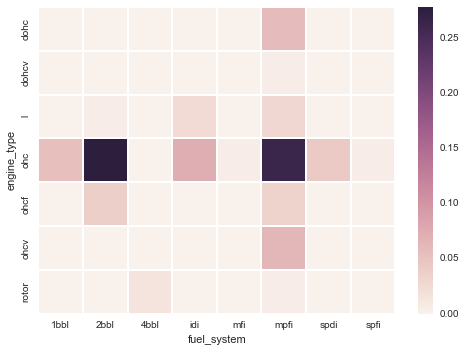

In [32]:
frequencies = pd.crosstab( autos[ "engine_type"], autos[ "fuel_system"]).apply(lambda r: r/len(autos))
print frequencies

sns.heatmap( frequencies)

This might be especially true when many of the values are zero as the color encoding makes the non-zero values "pop".

You may want to conditionalize on one or the other variable. The following table and heatmap show $P(fuel\_system|engine\_type)$:

fuel_system      1bbl      2bbl  4bbl       idi       mfi      mpfi      spdi      spfi
engine_type                                                                            
dohc         0.000000  0.000000  0.00  0.000000  0.000000  1.000000  0.000000  0.000000
dohcv        0.000000  0.000000  0.00  0.000000  0.000000  1.000000  0.000000  0.000000
l            0.000000  0.083333  0.00  0.416667  0.000000  0.500000  0.000000  0.000000
ohc          0.074324  0.385135  0.00  0.101351  0.006757  0.364865  0.060811  0.006757
ohcf         0.000000  0.533333  0.00  0.000000  0.000000  0.466667  0.000000  0.000000
ohcv         0.000000  0.000000  0.00  0.000000  0.000000  1.000000  0.000000  0.000000
rotor        0.000000  0.000000  0.75  0.000000  0.000000  0.250000  0.000000  0.000000


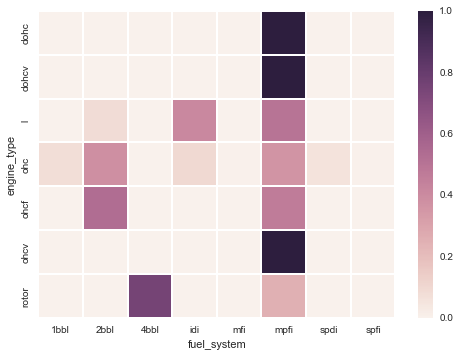

In [33]:
frequencies = pd.crosstab( autos[ "engine_type"], autos[ "fuel_system"]).apply(lambda r: r/r.sum(), axis=1)
print frequencies

sns.heatmap( frequencies)

Fully understanding the ramifications of this data requires domain knowledge.

## Qualitative v. Quantitative Variables

The main approaches for comparisons of a qualitative variable and a quantitative variable is to use the graphical and non-graphical approaches for the quantitative variables for each value of the qualitative variable. The qualitative values define categories and those categories may or may not prove to be important to the analysis. For example, if the distribution of height is not different for men and women then height is not an interesting category for analyzing height.

### Multiple Summary Statistics

Suppose we want to see the summary statistics for the curb weight of cars given the body style. We can calculate summary statistics for each value of body_style by grouping the data appropriately:

In [34]:
grouped = autos.groupby( "body_style")
curb_weight = grouped[ "curb_weight"].describe()
curb_weight = curb_weight.unstack( level=-1)
print curb_weight

             count         mean         std   min      25%     50%      75%   max
body_style                                                                       
convertible      6  2801.666667  497.786567  2254  2548.00  2674.0  2931.25  3685
hardtop          8  2810.625000  548.038043  2008  2539.00  2717.5  2940.75  3715
hatchback       70  2348.185714  419.719792  1488  1989.75  2294.5  2712.25  3366
sedan           96  2610.593750  545.760051  1874  2211.25  2410.0  3046.00  4066
wagon           25  2784.240000  500.867937  2024  2420.00  2650.0  3157.00  3750


The differences are particularly stark, however. In order to see what's going on, we need to use visualization. We can apply any of the single variable methods to each grouping by body_style. Let's start with the boxplot.

### Multiple Boxplots

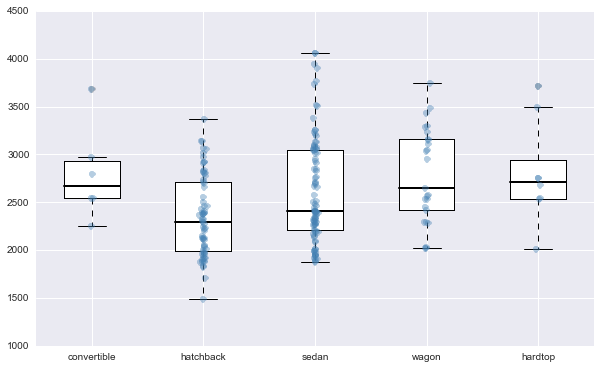

In [35]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

body_styles = pd.unique( autos[ "body_style"].values)
data = [grouped[ "curb_weight"].get_group( k) for k in body_styles]
patch = axes.boxplot( data, labels=body_styles, patch_artist=True)
restyle_boxplot( patch)

for i, k in enumerate( body_styles):
    data = grouped[ "curb_weight"].get_group( k)
    x = np.random.normal(i + 1, 0.01, size=len(data))
    axes.plot(x, data, 'o', alpha=0.4, color="steelblue")

plt.show()

Now we can see the differences between the distributions for curb weight by body style. This is also the first time we've seen *outliers*. There is no formal definition of an outlier and not all outliers are bad or wrong. For boxplots, an outlier is any point more than 1.5 times the interquartile range away from either the 1st quartile or the second quartile.

We can also see that some of the categories are very sparse (convertible and hardtop), that wagon probably has two peaks. All of these factors might play into our determination earlier that the normal distribution was not a good model for curb weight. Of course, if we take body style into account, it still may not be but now we have someplace to dig deeper.

### Multiple Histograms

You can, of course, plot multiple histograms. In some tools, you can plot them one over the other. Our experience with visualization might suggest it's a bad idea but let's give it a try:

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


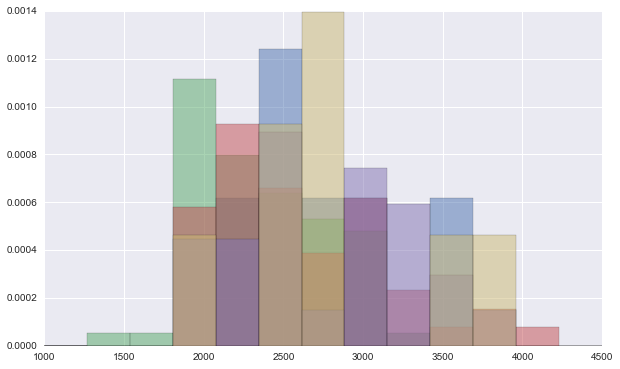

In [36]:
bins = [1000 + i for i in xrange( 0, 3500, 269)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
print body_styles
for k in body_styles:
    data = grouped[ "curb_weight"].get_group( k).values
    axes.hist( data, bins=bins, normed=True, alpha=0.5)
plt.show()

No, that didn't work. Let's try small multiples instead.

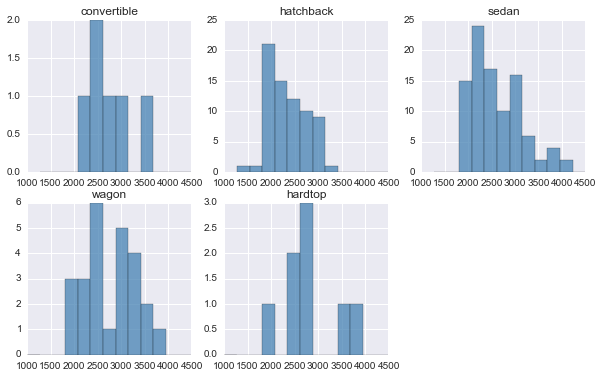

In [37]:
bins = [1000 + i for i in xrange( 0, 3500, 269)]

figure = plt.figure(figsize=(10, 6))

for i, body in enumerate( body_styles):
    axes = figure.add_subplot(2, 3, i + 1)
    data = grouped[ "curb_weight"].get_group( body).values
    axes.hist( data, bins=bins, alpha=0.75, color="steelblue")
    axes.set_title( body)
plt.show()

That's better but the scales are all different. Normally, one uses the same scale for each multiple. However, this is raw count data and there aren't that many wagons:

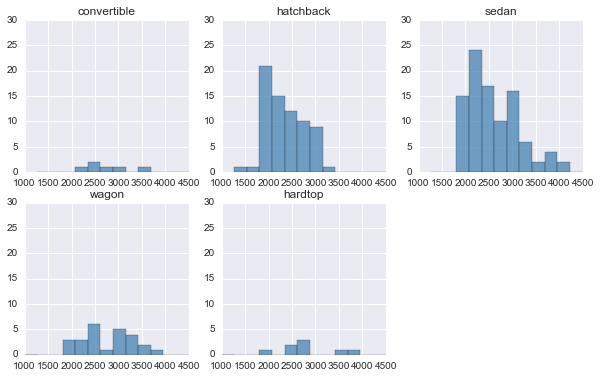

In [38]:
bins = [1000 + i for i in xrange( 0, 3500, 269)]

figure = plt.figure(figsize=(10, 6))

for i, body in enumerate( body_styles):
    axes = figure.add_subplot(2, 3, i + 1)
    data = grouped[ "curb_weight"].get_group( body).values
    axes.hist( data, bins=bins, alpha=0.75, color="steelblue")
    axes.set_title( body)
    axes.set_ylim((0, 30))
plt.show()

Setting the upper bounds on the y axis to the largest bin count forces the histograms for cars with fewer observations to be smaller. If we switch to densities:

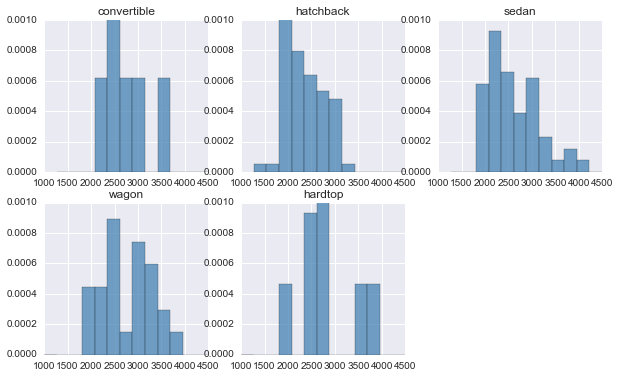

In [39]:
bins = [1000 + i for i in xrange( 0, 3500, 269)]

figure = plt.figure(figsize=(10, 6))

for i, body in enumerate( body_styles):
    axes = figure.add_subplot(2, 3, i + 1)
    data = grouped[ "curb_weight"].get_group( body).values
    axes.hist( data, bins=bins, normed=True,alpha=0.75, color="steelblue")
    axes.set_title( body)
    axes.set_ylim((0, 0.001))
plt.show()

we can do a bit better but we lose any indication of how important each group is in the overall total. You don't want to spend all day analyzing six cars out of 205. Generally, this just means you have to look at the data a lot of different ways.

Small multiples allow us to examine the distributional shapes for each category.

## Quantitative v. Quantitative Variables

So far we've seen boxplots, bar graphs, histograms and QQ-plots but we haven't seen one of the more common and obvious charts: the XY-plot or scatter plot. The scatter plot is used to compare two quantitative variables.

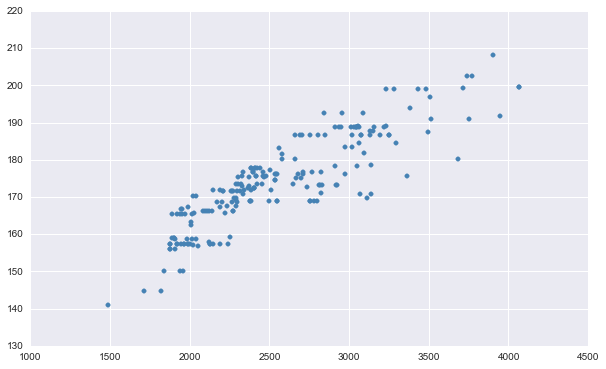

In [48]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( autos[ "curb_weight"], autos["length"], marker="o", color="steelblue")

plt.show()

Clearly longer cars are heavier!

Notice that even though we're plotting two continuous valued variables, there are certainly regularities to the data. This is because of the granularity at which length is measured. As a result there is also a fair amount of overplotting. We should probably use some transparency.

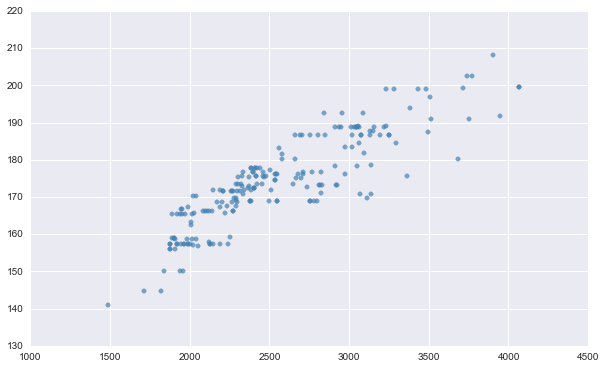

In [41]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( autos[ "curb_weight"], autos["length"], marker="o", color="steelblue", alpha=0.7)

plt.show()

This makes it a bit clearer. Areas of the chart where there are more observations clumping around are more obvious. You should probably just use some transparency whenever you make a plot.

The effect is even more pronounced when we look at weight versus MPG:

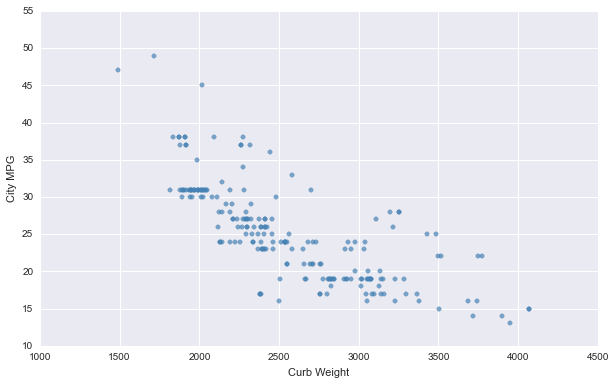

In [42]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( autos[ "curb_weight"], autos["city_mpg"], marker="o", color="steelblue", alpha=0.7)
axes.set_ylabel( "City MPG")
axes.set_xlabel( "Curb Weight")
plt.show()

In this case, we might also want to add a bit of jitter which would take the form of a small amount of random noise added to *both* variables, weight and MPG>

It may be the case however, that you have so much data that not even jitter and alpha adjustments will not suffice. In that case you may consider binning, specifically, hex binning. Hex binning divides the XY space up into hexagonal bins and instead of plotting points plots the counts in each bin:

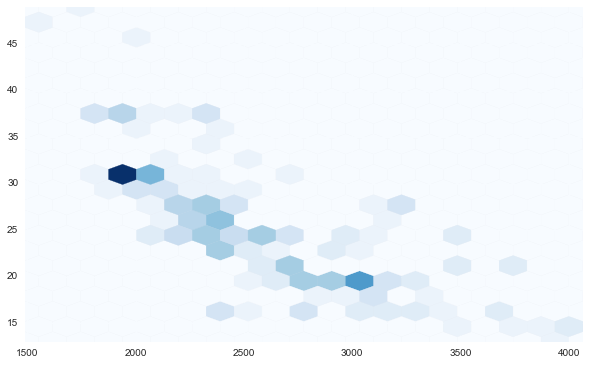

In [43]:
from matplotlib import cm

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hexbin( autos[ "curb_weight"], autos["city_mpg"], gridsize=20, cmap=cm.Blues)

plt.show()

As we investigate our data, looking at the variables and relationships between them, we generally want a sense of the degree of relationship, if any, between two variables. We can get a visual sense of the relationship by overlaying a locally weighted regression line (LOESS) over our scatterplot:

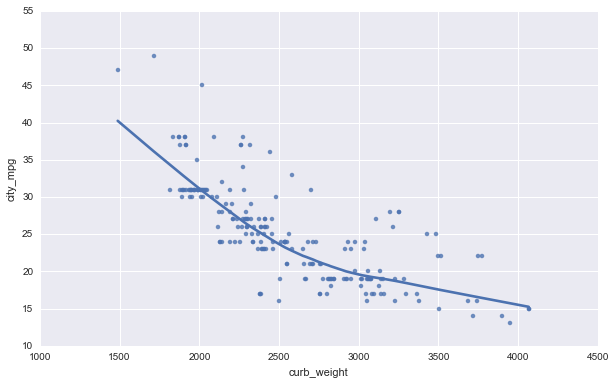

In [44]:
figure = plt.figure(figsize=(10, 6))

sns.regplot( x="curb_weight", y="city_mpg", data=autos, lowess=True)

plt.show()

A common non-parametric statistic for looking at correlation is Spearman's Rank Order Coefficient or Spearman's Rank Correlation Coefficient or Spearman's Rho. Spearman's rho orders each variable and replaces it with its *order* in the data (1st, 2nd, 3rd, etc.) and then looks to see how the order of one variable relates to the other If X is the variable's value then x is that values rank:

$$\rho = 1 - \frac{6\sum (x_i - y_i)^2_i}{n(n^2 - 1)}$$

We can calculate Spearman's rho in R as follows:

In [45]:
stats.spearmanr( autos[ "curb_weight"], autos[ "city_mpg"])[ 0]

-0.8129472784007471

The interpretation of Spearman's rho is as follows. If rho is -1.0 there is a perfect, decreasing monotonic relationship between the variables, if rho is 0.0 the relationship is not monotonic, and if rho is 1.0 there is a perfect, incrasing monotonic relationship between the variables. We do not, however, know what functional shape this monotonic relationship takes.

For the autos data, looking at curb.weight and city.mpg, Spearman's rho is -0.819473 which indicates a strong monotonic relationship.

## Advanced Techniques

The previous techniques were the basic visualization techniques but sometimes you need something a bit more heavy duty. We'll review a few advanced techniques here.

### Color

In the last series of plots we look at comparing two quantitative variables. It's difficult on a flat surface to compare three or more quantitative variables although if you have an interactive device, three is possible but still not encouraged mostly because even if you can move everything around, you still can't hold that many comparisons in your head at once.

However, if one of the three variables is qualitative, you might be able to use color. If that fails, you can move on to small multiples.

### Subsetting

If we want to isolate a group of points or identify any outliers and want to eliminate them, we can do so by subsetting (logical indexing). For example, if we want to eliminate the smaller body style classes from our data, we can do subsetting.

### Small Multiples and Lattices

One of the big advantages we have as humans is pattern recognition. However, the facility can be easily overwhelmed. You see this all the time with charts of 25 different things with different colors and values. The solution to this was suggested by Edward Tufte. Instead of showing a single bar chart with 5 colors each representing one body style, we had 5 small charts. We already saw this with the multiple category histograms.

Another version of this is the lattice plot. The lattice plot automatically creates a pairwise comparison of all of the indicated variables.

### Projections

When we look a scatterplot of something like city_mpg versus curb.weight, we are looking at the variables in their measured dimensions on the standard Cartesian plane. This may not, however, be the best space for viewing the variation in the data.

Principal Components Analysis (PCA) first projects a data set into its dimension of highest variance and successively finds orthogonal dimensions that explain the remaining variance. The results are thus a "change of basis" for the data (if you remember what a "change of basis" is from linear algebra, that might help). It accomplishes this by eigen-decomposition of the correlation matrix after mean centering and normalizing of the data or singular value decomposition of the data matrix.

When you're done, you have N linear combinations of your variables (the principal components) where the weights on each principle component are the *loadings* for each variable and the tranformed data is called the *scores*.

PCA can only be used with quantitative data. If there are only a few qualitative variables, color might help or you may need to rely on small multiples.

Here we can see that the first principal component explains 56% of the variation in the data, the second PC explains 20% of the remaining variance (77% cumulative) and the 3rd PC explains nearly 10% additional variance (87% cumulative).

## Other Considerations

### Source

However, it does have a few disadvantages in that it is *enumerated* data instead of either *observational* or *sampled* data.^[*Enumerated* data is just list of all possible outcomes such as all the new cars this model year or all of the mushrooms in a field guide. There are several datasets in the UCI repository that are like this. *Observational* data is data that comes from some observational process like a website server log or the actual performance statistics of cars at the shopping mall *Sampled* data is usually from some formal (random) selection process like randomly selecting people to visit your site or randomly selecting people to have their car examined.]

### Censoring

Right or Left Censored or Both

